In [100]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [101]:
# utilizado para manejos de directorios y rutas
import os

# Computacion vectorial y cientifica para python
import numpy as np

# Librerias para graficación (trazado de gráficos)
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D  # Necesario para graficar superficies 3D

# llama a matplotlib a embeber graficas dentro de los cuadernillos
%matplotlib inline

from sklearn.preprocessing import StandardScaler



In [102]:
import numpy as np

# Cargar datos del archivo CSV como cadenas
data = np.genfromtxt('/content/sample_data/taxitripcorregido.csv', delimiter=',', dtype=str)

# Extraer las columnas que necesitas
X = data[:, [4, 5, 6, 8, 9, 10, 11, 12, 13, 14, 15, 16]]  # Tomar en cuenta solo los valores a partir de la 4ta columna y omitir la columna 7
y = data[:, 17]  # La columna 18

# Calcular el número de ejemplos de entrenamiento
m = y.size

print(X)

[['6' '3.34' '1' ... '2.76' '0' '0.3']
 ['1' '1.8' '1' ... '4' '0' '0.3']
 ['1' '1' '1' ... '1.45' '0' '0.3']
 ...
 ['1' '0.42' '1' ... '0' '0' '0.3']
 ['1' '2.36' '1' ... '1.7' '0' '0.3']
 ['1' '2.1' '1' ... '2.35' '0' '0.3']]


In [103]:
from sklearn.preprocessing import MinMaxScaler

# Convertir datos a tipo float
X = X.astype(float)

# Crear el objeto MinMaxScaler
scaler = MinMaxScaler()

# Ajustar el scaler a los datos y transformarlos
X_normalized = scaler.fit_transform(X)

print(X_normalized)

[[1.         0.098351   0.         ... 0.0138     0.         1.        ]
 [0.16666667 0.05300353 0.         ... 0.02       0.         1.        ]
 [0.16666667 0.02944641 0.         ... 0.00725    0.         1.        ]
 ...
 [0.16666667 0.01236749 0.         ... 0.         0.         1.        ]
 [0.16666667 0.06949352 0.         ... 0.0085     0.         1.        ]
 [0.16666667 0.06183746 0.         ... 0.01175    0.         1.        ]]


In [104]:
def featureNormalize(X):
    mu = np.mean(X, axis=0)
    sigma = np.std(X, axis=0)
    X_norm = (X - mu) / sigma
    return X_norm, mu, sigma

# Convertir datos a tipo float
X = X.astype(float)

# Aplicar la normalización de características
X_norm, mu, sigma = featureNormalize(X)

print("Datos originales:")
print(X)
print('Media calculada:', mu)
print('Desviación estándar calculada:', sigma)
print("Datos normalizados:")
print(X_norm)


Datos originales:
[[6.   3.34 1.   ... 2.76 0.   0.3 ]
 [1.   1.8  1.   ... 4.   0.   0.3 ]
 [1.   1.   1.   ... 1.45 0.   0.3 ]
 ...
 [1.   0.42 1.   ... 0.   0.   0.3 ]
 [1.   2.36 1.   ... 1.7  0.   0.3 ]
 [1.   2.1  1.   ... 2.35 0.   0.3 ]]
Media calculada: [  1.64231904   2.91331292   1.04339398 162.41235297 161.52799683
   1.33688709  13.02662937   0.33327459   0.49744482   1.83578131
   0.31254152   0.29955064]
Desviación estándar calculada: [1.28520281e+00 3.65309071e+00 7.08375281e-01 6.66319056e+01
 7.01381457e+01 4.96200127e-01 1.32434988e+01 4.63086378e-01
 3.94641180e-02 2.80056458e+00 1.39918111e+00 1.56723924e-02]
Datos normalizados:
[[ 3.39065627  0.11680167 -0.06125846 ...  0.33001156 -0.2233746
   0.02867201]
 [-0.4997803  -0.30475918 -0.06125846 ...  0.77277943 -0.2233746
   0.02867201]
 [-0.4997803  -0.52375182 -0.06125846 ... -0.13775126 -0.2233746
   0.02867201]
 ...
 [-0.4997803  -0.68252149 -0.06125846 ... -0.65550401 -0.2233746
   0.02867201]
 [-0.4997803  -0.

In [105]:
# Añadir el término de intersección a X
# (Columna de unos para X0)
X = np.concatenate([np.ones((m, 1)), X_norm], axis=1)

In [106]:
print(X)

[[ 1.          3.39065627  0.11680167 ...  0.33001156 -0.2233746
   0.02867201]
 [ 1.         -0.4997803  -0.30475918 ...  0.77277943 -0.2233746
   0.02867201]
 [ 1.         -0.4997803  -0.52375182 ... -0.13775126 -0.2233746
   0.02867201]
 ...
 [ 1.         -0.4997803  -0.68252149 ... -0.65550401 -0.2233746
   0.02867201]
 [ 1.         -0.4997803  -0.15146433 ... -0.04848355 -0.2233746
   0.02867201]
 [ 1.         -0.4997803  -0.22263694 ...  0.18361251 -0.2233746
   0.02867201]]


In [107]:
def computeCostMulti(X, y, theta):
    # Inicializa algunos valores útiles
    m = y.shape[0]  # número de ejemplos de entrenamiento

    J = 0

    h = np.dot(X, theta)

    J = (1 / (2 * m)) * np.sum(np.square(h - y))

    return J

In [108]:
def gradientDescentMulti(X, y, theta, alpha, num_iters):
    # Inicializa algunos valores
    m = y.shape[0]  # número de ejemplos de entrenamiento

    # realiza una copia de theta, el cual será actualizada por el descenso por el gradiente
    theta = theta.copy()

    J_history = []

    for i in range(num_iters):
        theta = theta - (alpha / m) * np.dot(X.T, np.dot(X, theta) - y)
        J_history.append(computeCostMulti(X, y, theta))

    return theta, J_history

In [109]:
print(X.shape)

(22699, 13)


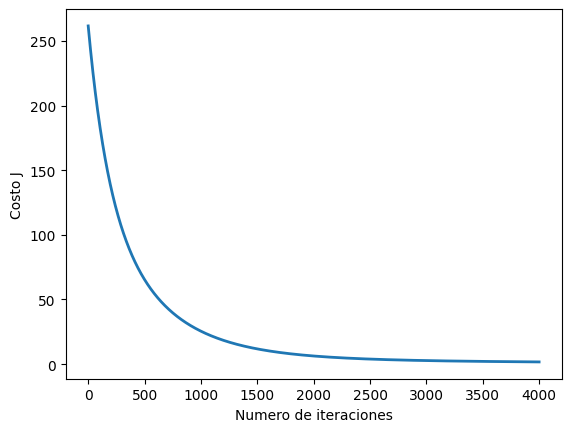

Theta calculado por el descenso por el gradiente: [ 1.60123622e+01  9.14147356e-03  2.44776770e+00  2.80156662e-01
  2.69533733e-02  4.68737454e-02  6.59044180e-01  9.68051478e+00
  3.81353686e-01 -6.79211443e-01  4.46297513e+00  9.50819145e-01
  6.54989484e-01]
El precio predecido para un conjunto de características X_array (usando el descenso por el gradiente): $19.84


In [121]:
import matplotlib.pyplot as plt

# Elegir algún valor para alpha (probar varias alternativas)
alpha = 0.001
num_iters = 4000

# Inicializa theta y ejecuta el descenso por el gradiente
theta = np.zeros(X.shape[1])
y = y.astype(float)
theta, J_history = gradientDescentMulti(X, y, theta, alpha, num_iters)

# Grafica la convergencia del costo
plt.plot(np.arange(len(J_history)), J_history, lw=2)
plt.xlabel('Numero de iteraciones')
plt.ylabel('Costo J')
plt.show()

# Muestra los resultados del descenso por el gradiente
print('Theta calculado por el descenso por el gradiente:', theta)


X_array = np.array([1,1.8,1,186,43,1,16,0,0.5,4,0,0.3])
X_array_normalized = (X_array - mu) / sigma
X_array_normalized = np.insert(X_array_normalized, 0, 1)  # Agregar el término de intersección
price = np.dot(X_array_normalized, theta)

print('El precio predecido para un conjunto de características X_array (usando el descenso por el gradiente): ${:.2f}'.format(price))



In [129]:
X_array = np.array([1, 1, 1, 262, 236, 1, 6.5, 0, 0.5, 1.45, 0, 0.3])

# Normalizar todas las características de X_array
X_array = (X_array - mu) / sigma

print("X_array normalizado:", X_array)


X_array normalizado: [-0.4997803  -0.52375182 -0.06125846  1.49459401  1.06179031 -0.6789339
 -0.49281761 -0.71968127  0.06474688 -0.13775126 -0.2233746   0.02867201]


In [132]:
# Agregar una columna de unos al principio de X_array para representar el término de intersección
X_array_with_intercept = np.insert(X_array, 0, 1)

# Calcular el precio predicho usando el producto punto
price = np.dot(X_array_with_intercept, theta)

# Imprimir el precio predicho
print('El precio predicho para un conjunto de características X_array (usando el descenso por el gradiente): ${:.0f}'.format(price))


El precio predicho para un conjunto de características X_array (usando el descenso por el gradiente): $8


In [134]:
X_array = np.array([1,2.1,1,239,236,1,11,0,0.5,2.35,0,0.3])

# Normalizar todas las características de X_array
X_array = (X_array - mu) / sigma

print("X_array normalizado:", X_array)

X_array normalizado: [-0.4997803  -0.22263694 -0.06125846  1.14941403  1.06179031 -0.6789339
 -0.15302824 -0.71968127  0.06474688  0.18361251 -0.2233746   0.02867201]


In [135]:
# Agregar una columna de unos al principio de X_array para representar el término de intersección
X_array_with_intercept = np.insert(X_array, 0, 1)

# Calcular el precio predicho usando el producto punto
price = np.dot(X_array_with_intercept, theta)

# Imprimir el precio predicho
print('El precio predicho para un conjunto de características X_array (usando el descenso por el gradiente): ${:.0f}'.format(price))

El precio predicho para un conjunto de características X_array (usando el descenso por el gradiente): $14
